<a href="https://colab.research.google.com/github/Kimuksung/bigdata/blob/master/SamsungLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/gdrive/My Drive/samsung/mealData_meal_train2.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 
#/content/drive/My Drive/samsung/mealData_meal_test.csv
df2 = pd.read_csv('/gdrive/My Drive/samsung/mealData_meal_test.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 
df3 = pd.read_csv('/gdrive/My Drive/samsung/weather2.csv',engine='python',encoding='euc-kr') 

df3.columns = ['Date' , 'Temperature', 'Rain']
df3['Date'] = df3['Date'].str.replace("/","-")
df3['Temperature'] = df3['Temperature'].str.replace("\['평균기온:","")
df3['Temperature'] = df3['Temperature'].str.replace("']","")
df3['Rain'] = df3['Rain'].str.replace("[","")
df3['Rain'] = df3['Rain'].str.replace("]","")
df3['Rain'] = df3['Rain'].str.replace("\'일강수량:","")
df3['Rain'] = df3['Rain'].str.replace("'","")

for i in range(len(df3['Rain'])):
  if df3['Rain'][i] == '':
    df3['Rain'][i] = "0.0"
df3[df3['Date']=='2019-05-24']  # 507

df['weekday'] = pd.to_datetime(df["SELL_DATE"]).dt.dayofweek
df=df[df['weekday']!= 5]

df2['weekday'] = pd.to_datetime(df2["SELL_DATE"]).dt.dayofweek
df2=df2[df2['weekday']!= 5]

df = df[['SELL_DATE','weekday']]
df = df.drop_duplicates()

arr=[]
for i in df.weekday:
  if i ==0 or i==4:
    arr.append(0.5)
  else:
    arr.append(0)

df['holiday'] = arr
df = df.set_index('SELL_DATE')

df2 = df2[['SELL_DATE','weekday']]
df2 = df2.drop_duplicates()

arr=[]
for i in df2.weekday:
  if i ==0 or i==4:
    arr.append(0.5)
  else:
    arr.append(0)

df2['holiday'] = arr
df2 = df2.set_index('SELL_DATE')

train_holiday = ['2018-01-02','2018-02-14','2018-02-17','2018-02-28','2018-03-02','2018-05-21','2018-05-23','2018-06-05','2018-06-07',
                 '2018-08-14', '2018-08-16',
           '2018-09-23','2018-09-26','2018-10-02','2018-10-04','2018-10-08','2018-10-10','2018-12-24','2018-12-26','2018-12-31',
           '2019-01-02','2019-02-03','2019-02-07','2019-02-28','2019-03-02']

test_holiday = ['2019-06-05','2019-06-07']

for holidays in train_holiday :
  if holidays in df.index:
    df[holidays:holidays].holiday = df[holidays:holidays].holiday + 0.5

for holidays in test_holiday :
  if holidays in df2.index:
    df2[holidays:holidays].holiday = df2[holidays:holidays].holiday + 0.5

tmp = df3[:508].set_index('Date')
df['Temperature'] = tmp.Temperature
df['Rain'] = tmp.Rain

df[4:]
df['Temperature'] = [float(i) for i in df.Temperature]
df['Rain'] = [float(i) for i in df.Rain]
df.info()

x_train = pd.read_csv('/gdrive/My Drive/samsung/mealData_meal_train2.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'})
x_train['weekday'] = pd.to_datetime(x_train["SELL_DATE"]).dt.dayofweek
x_train=x_train[x_train['weekday']!= 5]
train = x_train.groupby('SELL_DATE').sum()['QUANTITY']
#train.set_index(trainset['SELL_DATE'],inplace=True)

train2 = pd.DataFrame({'QUANTITY' : train})
train2

for s in range(1, 6):
    train2['shift_{}'.format(s)] = train2['QUANTITY'].shift(s)

df['QUANTITY'] = train2.QUANTITY
df['shift_1'] = train2.shift_1
df['shift_2'] = train2.shift_2
df['shift_3'] = train2.shift_3
df['shift_4'] = train2.shift_4
df['shift_5'] = train2.shift_5

tmp = df3[508:].set_index('Date')
df2['Temperature'] = tmp.Temperature
df2['Rain'] = tmp.Rain

df2['Temperature'] = [float(i) for i in df2.Temperature]
df2['Rain'] = [float(i) for i in df2.Rain]
df2

x_test = pd.read_csv('/gdrive/My Drive/samsung/mealData_meal_test.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'})
x_test['weekday'] = pd.to_datetime(x_test["SELL_DATE"]).dt.dayofweek
x_test=x_test[x_test['weekday']!= 5]
test = x_test.groupby('SELL_DATE').sum()['QUANTITY']
test
#train.set_index(trainset['SELL_DATE'],inplace=True)

test2 = pd.DataFrame({'QUANTITY' : test})

for s in range(1, 6):
    test2['shift_{}'.format(s)] = test2['QUANTITY'].shift(s)

df2['QUANTITY'] = test2.QUANTITY
df2['shift_1'] = test2.shift_1
df2['shift_2'] = test2.shift_2
df2['shift_3'] = test2.shift_3
df2['shift_4'] = test2.shift_4
df2['shift_5'] = test2.shift_5

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 2018-01-02 to 2019-05-24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday      342 non-null    int64  
 1   holiday      342 non-null    float64
 2   Temperature  342 non-null    float64
 3   Rain         342 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 23.4+ KB


In [3]:
df

,weekday,holiday,Temperature,Rain,QUANTITY,shift_1,shift_2,shift_3,shift_4,shift_5
SELL_DATE,,,,,,,,,,
2018-01-02,1,0.5,-1.0,0.0,3146,NaN,NaN,NaN,NaN,NaN
2018-01-03,2,0.0,-4.0,0.0,3112,3146.0,NaN,NaN,NaN,NaN
2018-01-04,3,0.0,-4.0,0.0,2936,3112.0,3146.0,NaN,NaN,NaN
2018-01-05,4,0.5,-3.0,0.0,2760,2936.0,3112.0,3146.0,NaN,NaN
2018-01-08,0,0.5,1.0,0.9,3241,2760.0,2936.0,3112.0,3146.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-05-20,0,0.5,16.0,8.7,3626,3085.0,3349.0,3046.0,3281.0,3586.0
2019-05-21,1,0.0,17.0,0.0,3417,3626.0,3085.0,3349.0,3046.0,3281.0
2019-05-22,2,0.0,19.0,0.0,3248,3417.0,3626.0,3085.0,3349.0,3046.0


In [4]:
df2

,weekday,holiday,Temperature,Rain,QUANTITY,shift_1,shift_2,shift_3,shift_4,shift_5
SELL_DATE,,,,,,,,,,
2019-05-27,0,0.5,17.0,7.1,3780,NaN,NaN,NaN,NaN,NaN
2019-05-28,1,0.0,18.0,0.0,3151,3780.0,NaN,NaN,NaN,NaN
2019-05-29,2,0.0,20.0,0.0,3304,3151.0,3780.0,NaN,NaN,NaN
2019-05-30,3,0.0,19.0,0.0,3113,3304.0,3151.0,3780.0,NaN,NaN
2019-05-31,4,0.5,19.0,0.0,2914,3113.0,3304.0,3151.0,3780.0,NaN
2019-06-03,0,0.5,23.0,0.0,3380,2914.0,3113.0,3304.0,3151.0,3780.0
2019-06-04,1,0.0,22.0,0.0,3161,3380.0,2914.0,3113.0,3304.0,3151.0
2019-06-05,2,0.5,23.0,0.0,2970,3161.0,3380.0,2914.0,3113.0,3304.0
2019-06-07,4,1.0,20.0,35.3,1356,2970.0,3161.0,3380.0,2914.0,3113.0


In [5]:
df[5:].corr()

,weekday,holiday,Temperature,Rain,QUANTITY,shift_1,shift_2,shift_3,shift_4,shift_5
weekday,1.000000,-0.012220,-0.013358,-0.034486,-0.481270,-0.040904,0.233954,0.185577,0.056375,-0.436897
holiday,-0.012220,1.000000,-0.011856,-0.050646,-0.183603,-0.556507,-0.173106,0.031384,0.276000,-0.020867
Temperature,-0.013358,-0.011856,1.000000,0.160918,-0.032674,-0.034577,-0.008273,-0.014747,-0.028710,-0.020385
Rain,-0.034486,-0.050646,0.160918,1.000000,0.158307,0.001130,0.009404,0.008298,-0.009400,0.024770
QUANTITY,-0.481270,-0.183603,-0.032674,0.158307,1.000000,0.180009,0.024244,0.024154,0.184283,0.295339
shift_1,-0.040904,-0.556507,-0.034577,0.001130,0.180009,1.000000,0.178352,0.024633,0.026636,0.188821
shift_2,0.233954,-0.173106,-0.008273,0.009404,0.024244,0.178352,1.000000,0.177720,0.021713,0.022467
shift_3,0.185577,0.031384,-0.014747,0.008298,0.024154,0.024633,0.177720,1.000000,0.174649,0.016281
shift_4,0.056375,0.276000,-0.028710,-0.009400,0.184283,0.026636,0.021713,0.174649,1.000000,0.167891
shift_5,-0.436897,-0.020867,-0.020385,0.024770,0.295339,0.188821,0.022467,0.016281,0.167891,1.000000


In [6]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
formula = "QUANTITY ~ shift_1 + shift_2 + shift_3 + shift_4 + shift_5 + holiday + Temperature + Rain + weekday"
y, X = dmatrices(formula, df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
0,400.914287,Intercept
1,1.594372,shift_1
2,1.142571,shift_2
3,1.091471,shift_3
4,1.215247,shift_4
5,1.366719,shift_5
6,1.681109,holiday
7,1.029552,Temperature
8,1.032012,Rain
9,1.398996,weekday


In [7]:
from statsmodels.formula.api import ols
formula = "QUANTITY ~ shift_1 + shift_2 + shift_3 + shift_4 + shift_5 + holiday + Temperature + Rain"
model = ols(formula, data =df[5:]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     9.003
Date:                Fri, 15 May 2020   Prob (F-statistic):           3.51e-11
Time:                        08:55:21   Log-Likelihood:                -2363.5
No. Observations:                 337   AIC:                             4745.
Df Residuals:                     328   BIC:                             4779.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1777.0841    295.893      6.006      0.000    1194.997    2359.171
shift_1         0.0005      0.063      0.007      0.994      -0.124       0.125
shift_2        -0.0270      0.052     -0.521      0.602      -0.129       0.075
shift_3        -0.0061      0.052     -0.119      0.906      -0.108       0.095
shift_4         0.2085      0.055      3.802      0.000       0.101       0.316
shift_5         0.2536      0.052      4.861      0.000       0.151       0.356
holiday      -262.2671     72.950     -3.595      0.000    -405.777    -118.757
Temperature    -1.3566      1.409     -0.963      0.336      -4.128       1.415
Rain            3.9947      1.349      2.962      0.003       1.342       6.647
==============================================================================
Omnibus:                       64.998   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.059
Skew:                          -0.724   Prob(JB):                     1.03e-63
Kurtosis:                       7.308   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
from statsmodels.formula.api import ols
formula = "QUANTITY ~ shift_1 + shift_2 + shift_3 + shift_4 + shift_5 + holiday + Temperature + Rain + weekday"
model = ols(formula, data =df[5:]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     21.87
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.97e-29
Time:                        08:55:25   Log-Likelihood:                -2317.5
No. Observations:                 337   AIC:                             4655.
Df Residuals:                     327   BIC:                             4693.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2029.8117    259.786      7.813      0.000    1518.749    2540.874
shift_1        -0.0080      0.055     -0.145      0.885      -0.116       0.100
shift_2         0.0855      0.047      1.833      0.068      -0.006       0.177
shift_3         0.0652      0.046      1.429      0.154      -0.025       0.155
shift_4         0.2680      0.048      5.551      0.000       0.173       0.363
shift_5         0.0108      0.052      0.209      0.835      -0.091       0.112
holiday      -280.2573     63.777     -4.394      0.000    -405.722    -154.793
Temperature    -1.5403      1.232     -1.251      0.212      -3.963       0.882
Rain            3.6518      1.179      3.098      0.002       1.333       5.971
weekday      -109.1524     10.782    -10.123      0.000    -130.364     -87.941
==============================================================================
Omnibus:                      201.576   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2310.630
Skew:                          -2.273   Prob(JB):                         0.00
Kurtosis:                      14.995   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
cols = ['shift_1' , 'shift_2' ,'shift_3' , 'shift_4','shift_5' , 'holiday' , 'Temperature','Rain','weekday']
from sklearn.linear_model import LinearRegression
liregression = LinearRegression()
model = liregression.fit( df[5:][cols] , df[5:]['QUANTITY'])

model.score(df[5:][cols] , df[5:]['QUANTITY'])

0.37570409209427613

In [15]:
cols = ['shift_1' , 'shift_2' ,'shift_3' , 'shift_4','shift_5']
from sklearn.linear_model import LinearRegression
liregression = LinearRegression()
model = liregression.fit( df[5:][cols] , df[5:]['QUANTITY'])

model.score(df[5:][cols] , df[5:]['QUANTITY'])

0.12218026641113933

In [13]:
cols = ['shift_1' , 'shift_2' ,'shift_3' , 'shift_4','shift_5' , 'holiday' , 'Temperature','Rain','weekday']
test_pred=model.predict( df2[5:][cols])
from sklearn.metrics import mean_squared_error , r2_score
print("mse :",mean_squared_error(df2[5:]['QUANTITY'], test_pred))
print("r^2 : ",r2_score(df2[5:]['QUANTITY'], test_pred))

mse : 71370.91938917649
r^2 :  0.2639576669363324


Text(0.5, 1.0, 'real_data vs Linearregression predict: $Y_i$ vs $\\hat{Y}_i$')

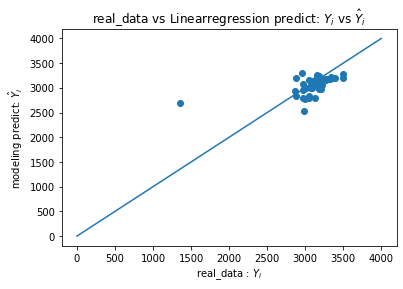

In [14]:
import matplotlib.pyplot as plt
x = np.arange(0,4000)
y=x
plt.scatter(df2[5:]['QUANTITY'], test_pred)
plt.plot(x, y)
plt.xlabel("real_data : $Y_i$")
plt.ylabel("modeling predict: $\hat{Y}_i$")
plt.title("real_data vs Linearregression predict: $Y_i$ vs $\hat{Y}_i$")

In [16]:
cols = ['shift_1' , 'shift_2' ,'shift_3' , 'shift_4','shift_5' ]
test_pred=model.predict( df2[5:][cols])
from sklearn.metrics import mean_squared_error , r2_score
print("mse :",mean_squared_error(df2[5:]['QUANTITY'], test_pred))
print("r^2 : ",r2_score(df2[5:]['QUANTITY'], test_pred))

mse : 96975.2704413238
r^2 :  -9.786781500609187e-05


Text(0.5, 1.0, 'real_data vs Linearregression predict: $Y_i$ vs $\\hat{Y}_i$')

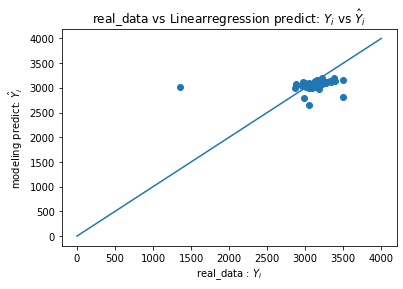

In [17]:
import matplotlib.pyplot as plt
x = np.arange(0,4000)
y=x
plt.scatter(df2[5:]['QUANTITY'], test_pred)
plt.plot(x, y)
plt.xlabel("real_data : $Y_i$")
plt.ylabel("modeling predict: $\hat{Y}_i$")
plt.title("real_data vs Linearregression predict: $Y_i$ vs $\hat{Y}_i$")